**Analysis of Commodity Prices Using Amazon Sagemaker Studio**

The measure of the value and importance of data analysis and visualization is not restricted to just gathering information and insights on the data. These insights can drive innovation by employing tools such as AI & ML to train models that can make important predictions based on the data that was analyzed. A useful service offered by AWS that helps to achieve this is Sagemaker. Amazon SageMaker is a managed ML seervice used to test,train and build models in the cloud. The essence of performing data analysis and visualisation in an Amazon sagemaker notebook is that it presents an opportunity to have a central hub for your data analytics workload to also be leveraged by ML engineers to train and build models that can make insightful predictions based on this data.   

The first section of this project is going to be centered on how to configure the Kaggle API to your Amazon SageMaker Studio notebook to easily access datasets for your projects. Thereafter, a brief demonstration on the analysis of commodity prices will also be done, using a dataset that can be accessed from Kaggle via its API integration to our notebook.


In [ ]:
#Firstly, you must install the Kaggle CLI
%pip install --q kaggle

Secondly you must have an account with Kaggle to have access to the API token that will be used to authenticate your access to Kaggle datasets via the CLI. To do this go to your Kaggle account, and click on your profile icon and select **Account**. On the accounts page go to the section titled **API** and click on **Create New API Token** to generate API credentials to grant you access to your Kaggle account via the commandline.

In [10]:
#Create a file to store your credentials
!touch ~/.kaggle/kaggle.json

In [2]:
#Fill the respective fields with your API details
kaggle_api_token = {"username":"","key":""}  

In [3]:
import json 

# Write Credentials to Kaggle file
with open('~/.kaggle/kaggle.json', 'w') as file: 
    json.dump(kaggle_api_token,file)

In [ ]:
#To ensure security and prevent access to your credentials, restrict access to just the owner
!chmod 600 ~/.kaggle/kaggle.json

After completing the above steps, you should be able to access your Kaggle account and load datasets as shown below.

In [3]:
!kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                     COVID-19 Dataset                                     5MB  2022-11-13 15:47:17          14985        424  1.0              
devrimtuner/list-of-moststreamed-songs-on-spotify             Top 100 Spotify Songs👑🎤🎧🎼                            3KB  2022-12-30 05:42:54            341         27  1.0              
thedevastator/analyzing-credit-card-spending-habits-in-india  Credit Card Spending Habits in India               319KB  2022-12-14 07:30:37           1532         53  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset            Fifa World Cu

In [ ]:
#The following commands downloads a datset of commodity prices and unzips it.
!kaggle datasets download -d elmoallistair/commodity-prices-19602021 --unzip 

In [2]:
#Import these libraries to interact with the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The are many visualisation libraries In python and depending on your audience, you can choose one that best suits the use case.

In [3]:
data = pd.read_csv('commodity_prices.csv')
data.head()

,Year,Cocoa,Coffee,Tea,Crude Oil,Coal,Natural Gas,Banana,Sugar,Orange,...,Silver,Cotton,Rubber,Tobacco,Coconut Oil,Groundnut Oil,Palm Oil,Soybean,Logs,Sawnwood
0,1960,0.59,0.92,1.03,1.63,NaN,0.14,0.14,0.07,0.13,...,0.91,0.65,0.78,1736.87,312.33,327.00,224.42,223.92,31.94,149.17
1,1961,0.48,0.90,0.95,1.57,NaN,0.15,0.13,0.06,0.13,...,0.92,0.67,0.60,1563.19,253.42,330.25,228.42,287.33,33.06,151.98
2,1962,0.46,0.83,0.97,1.52,NaN,0.16,0.13,0.06,0.11,...,1.08,0.65,0.56,1404.90,251.22,274.34,216.24,227.00,36.39,160.06
3,1963,0.55,0.81,0.95,1.50,NaN,0.16,0.14,0.18,0.09,...,1.28,0.65,0.52,1343.61,286.33,268.50,222.39,223.58,35.49,157.85
4,1964,0.51,1.01,0.93,1.45,NaN,0.15,0.17,0.13,0.08,...,1.29,0.65,0.49,1488.30,296.48,315.38,239.45,233.00,30.26,144.83


NaN values can be seen from the "coal' column, so it's prudent we omit them

In [4]:
data.dropna(axis=0, how='any')
data.describe()

,Year,Cocoa,Coffee,Tea,Crude Oil,Coal,Natural Gas,Banana,Sugar,Orange,...,Silver,Cotton,Rubber,Tobacco,Coconut Oil,Groundnut Oil,Palm Oil,Soybean,Logs,Sawnwood
count,62.000000,62.000000,62.000000,62.000000,62.000000,52.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1990.500000,1.719677,2.527097,1.752581,30.891452,48.505769,2.336935,0.500323,0.237097,0.475645,...,8.678226,1.433710,1.218387,2809.714194,674.460806,938.567097,512.494032,574.069677,175.032097,489.774355
std,18.041619,0.870195,1.243963,0.692082,29.452440,30.757456,2.078520,0.318181,0.141078,0.281295,...,7.804175,0.525548,0.855902,1149.665486,370.276577,500.374333,249.079513,287.962888,100.181092,256.052873
min,1960.000000,0.370000,0.810000,0.730000,1.210000,7.800000,0.140000,0.130000,0.040000,0.080000,...,0.910000,0.620000,0.330000,1042.650000,234.060000,268.500000,168.830000,178.080000,30.260000,144.830000
25%,1975.250000,1.105000,1.380000,1.152500,11.135000,28.965000,0.467500,0.230000,0.150000,0.222500,...,4.115000,1.087500,0.672500,1928.172500,397.702500,573.295000,294.875000,345.125000,84.250000,251.010000
50%,1990.500000,1.605000,2.705000,1.655000,19.895000,38.130000,1.995000,0.435000,0.210000,0.440000,...,5.350000,1.450000,0.965000,2717.780000,584.170000,891.750000,487.990000,548.045000,187.135000,484.715000
75%,2005.750000,2.362500,3.317500,2.090000,42.422500,62.025000,3.110000,0.660000,0.287500,0.672500,...,12.932500,1.757500,1.570000,3484.937500,877.055000,1271.085000,661.000000,747.722500,262.977500,736.145000
max,2021.000000,3.790000,5.980000,3.150000,105.010000,138.050000,8.920000,1.220000,0.650000,1.110000,...,35.220000,3.330000,4.820000,4990.770000,1730.080000,2359.060000,1193.370000,1385.410000,390.510000,939.450000


In [5]:
#To view the full list of columns
for col in data:
    print(col)

Year
Cocoa
Coffee
Tea
Crude Oil
Coal
Natural Gas
Banana
Sugar
Orange
Barley
Maize
Sorghum
Rice
Wheat
Beef
Chicken
Lamb
Shrimps
Gold
Platinum
Silver
Cotton
Rubber
Tobacco
Coconut Oil
Groundnut Oil
Palm Oil
Soybean
Logs
Sawnwood


Maize, Soybean, Rice and Sorghum are all annual crops. A farmer considering which crops to cultivate can look at the graph of these two crops over the years to make an informed decision on which crop the market might favor looking at the trend.

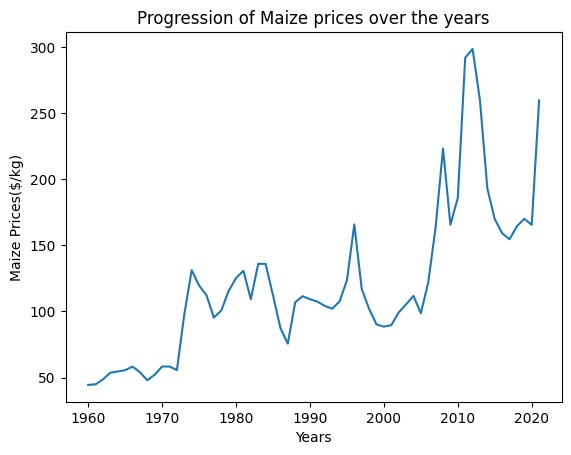

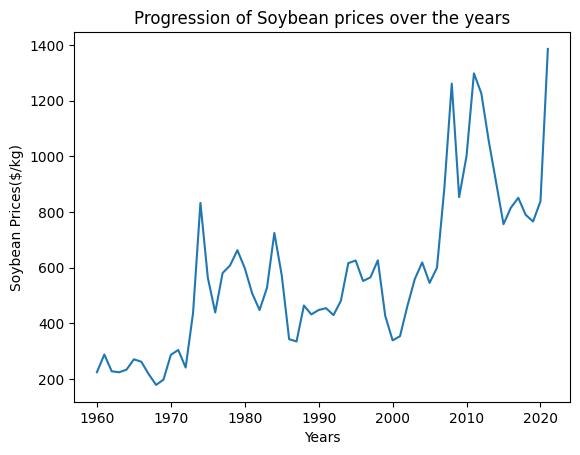

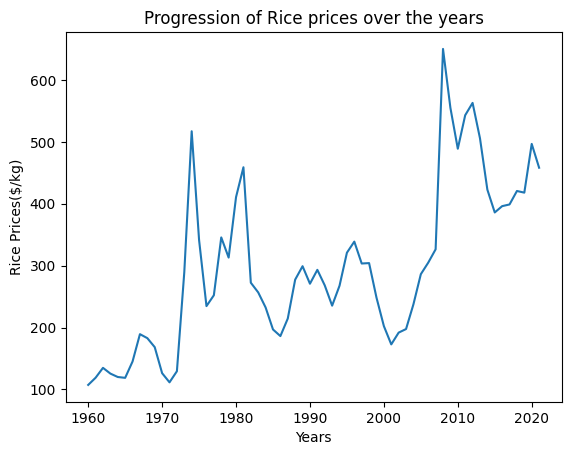

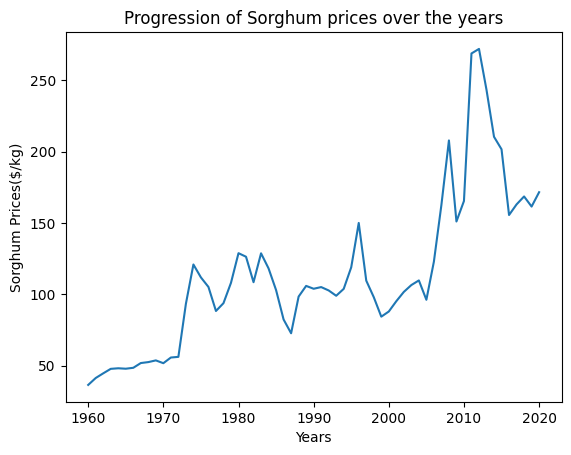

In [6]:
#Create Series
Year = data['Year']

#Annual crops 
Maize = data['Maize']
plt.plot(Year, Maize)
plt.title('Progression of Maize prices over the years')
plt.xlabel('Years')
plt.ylabel('Maize Prices($/kg)')
plt.show()

Soybean = data['Soybean']
plt.plot(Year, Soybean)
plt.title('Progression of Soybean prices over the years')
plt.xlabel('Years')
plt.ylabel('Soybean Prices($/kg)')
plt.show()


Rice = data['Rice']
plt.plot(Year, Rice)
plt.title('Progression of Rice prices over the years')
plt.xlabel('Years')
plt.ylabel('Rice Prices($/kg)')
plt.show()


Sorghum = data['Sorghum']
plt.plot(Year, Sorghum)
plt.title('Progression of Sorghum prices over the years')
plt.xlabel('Years')
plt.ylabel('Sorghum Prices($/kg)')
plt.show()

This simple analysis of commodity prices is just a brief demonstration of how the integration of kaggle into your sagemaker studio can aid data analysis, by having ready access to a plethora of datasets to conduct any data analysis project and also train and build models that can make valuable predictions either on stocks or any other dataset that your project requires.